- Pick up the titanic dataset from the seaborn library and do a detailed EDA. Summarize insights about the dataset at the bottom of the notebook
- Make sure you include univariate, bivariate and multivariate analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic= sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.size

13365

## Data cleaning

In [8]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
## Check for patterns in age nulls
titanic[titanic['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [10]:
## Since there is no pattern, median impute
titanic['age'].fillna(titanic['age'].median(), inplace=True)

/var/folders/ll/798hrfsj53z0dbzhfr7x8fp40000gn/T/ipykernel_93211/1801417098.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


In [11]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
## Check for patterns in deck nulls
titanic[titanic['deck'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,28.0,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [13]:
titanic.deck.value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [14]:
# No pattern and categorical- Mode impute
titanic['deck'].fillna(titanic['deck'].mode()[0], inplace=True)

/var/folders/ll/798hrfsj53z0dbzhfr7x8fp40000gn/T/ipykernel_93211/584256803.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['deck'].fillna(titanic['deck'].mode()[0], inplace=True)


In [15]:
## Check for nulls in embarked missing
num_missing = titanic['embarked'].isnull().sum()
num_missing

np.int64(2)

In [16]:
#Check for patterns
titanic[(titanic.survived==1)&(titanic.pclass==1) & (titanic.sex=='female') & (titanic.who=='woman')& (titanic.deck=='B')]


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
31,1,1,female,28.0,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
61,1,1,female,38.0,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
194,1,1,female,44.0,0,0,27.7208,C,First,woman,False,B,Cherbourg,yes,True
195,1,1,female,58.0,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True
257,1,1,female,30.0,0,0,86.5000,S,First,woman,False,B,Southampton,yes,True
291,1,1,female,19.0,1,0,91.0792,C,First,woman,False,B,Cherbourg,yes,False
299,1,1,female,50.0,0,1,247.5208,C,First,woman,False,B,Cherbourg,yes,False
311,1,1,female,18.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
329,1,1,female,16.0,0,1,57.9792,C,First,woman,False,B,Cherbourg,yes,False
369,1,1,female,24.0,0,0,69.3000,C,First,woman,False,B,Cherbourg,yes,True


In [17]:
# Since we see that everyone in this pattern is either from C or S
values = ['S', 'C']
random_choices = np.random.choice(values, size=num_missing)
titanic.loc[titanic['embarked'].isnull(), 'embarked'] = random_choices

In [18]:
# Check for embark_town equivalent in emabarked
titanic[titanic['embark_town'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,C,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,S,First,woman,False,B,NaN,yes,True


In [19]:
#Fill accordingly
titanic.loc[(titanic['embarked'] == 'S') & (titanic['embark_town'].isnull()), 'embark_town'] = 'Southampton'
titanic.loc[(titanic['embarked'] == 'C') & (titanic['embark_town'].isnull()), 'embark_town'] = 'Cherbourg'

In [20]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [21]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


## Visualizations

### Univariate
- To understand data distributions

#### Countplot
- Helps us understand the overall survival rate.
- The number of survived is lesser


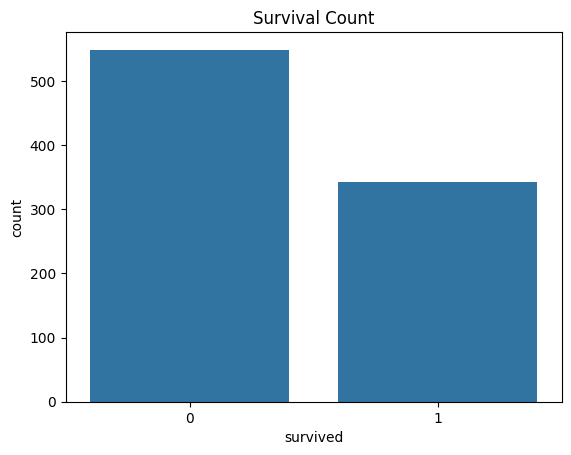

In [22]:
sns.countplot(x='survived', data=titanic)
plt.title('Survival Count')
plt.show()

#### histplot
- Age distribution
- visualize the age distribution, identify any outliers
- The people on titanic are mostly middle aged (around 30)

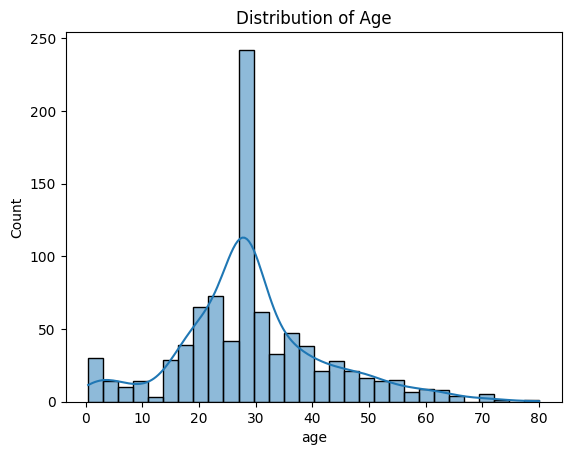

In [23]:

sns.histplot(titanic['age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.show()

#### countplot
- Class count
- Most of the people took a 3rd class ticket
- The least is 2nd class

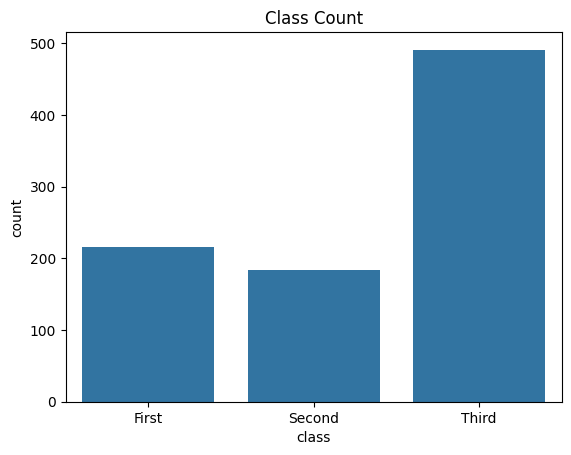

In [24]:

sns.countplot(x='class', data=titanic)
plt.title('Class Count')
plt.show()

#### Countplot
- To understand Gender distrbution

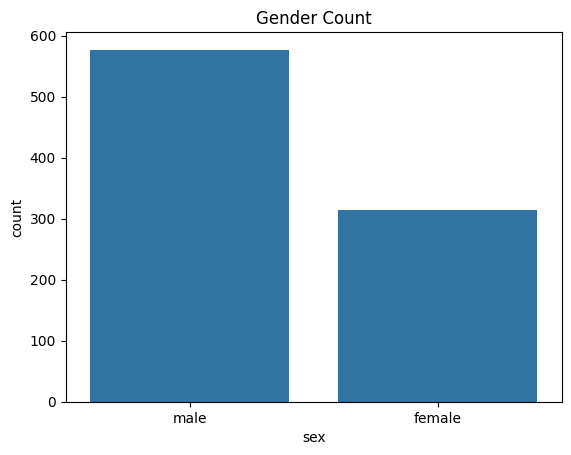

In [25]:
sns.countplot(x='sex', data=titanic)
plt.title('Gender Count')
plt.show()

### Bivariate

#### countplot
- To compare survival outcomes between males and females easily.
- The number of females survived is lesser than number of males survived.
- But the number of survived within females is higher and the number of survived within men is lower 

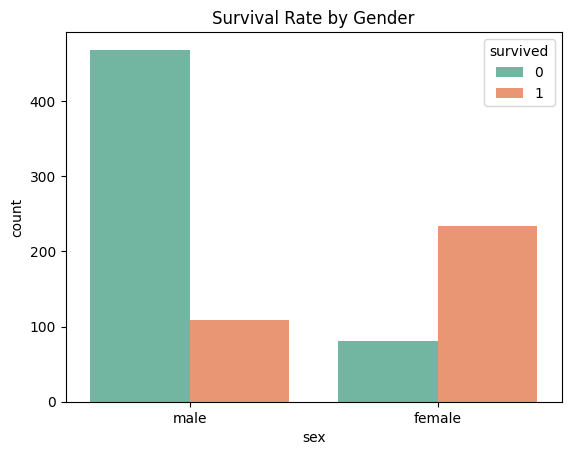

In [26]:
sns.countplot(x='sex', hue='survived', data=titanic, palette='Set2')
plt.title('Survival Rate by Gender')
plt.show()

#### countplot
- survived by class
- To undestand if higher classes were given preference to survive.
- The first and 2nd classes was definetely given prefernce to survive

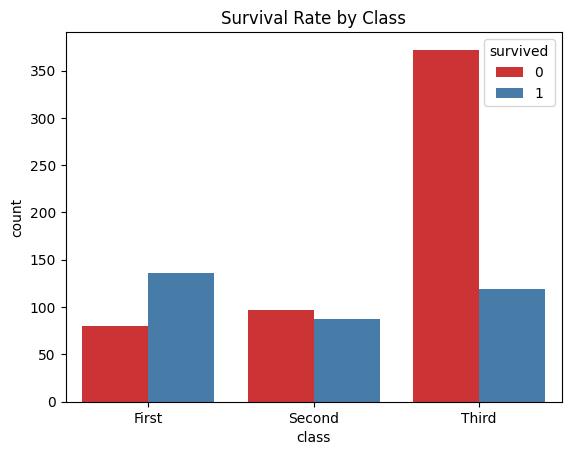

In [27]:
sns.countplot(x='class', hue='survived', data=titanic, palette='Set1')
plt.title('Survival Rate by Class')
plt.show()

#### catplot
- To assess whether there are differences in the age distribution that might indicate age played a role in survival rates

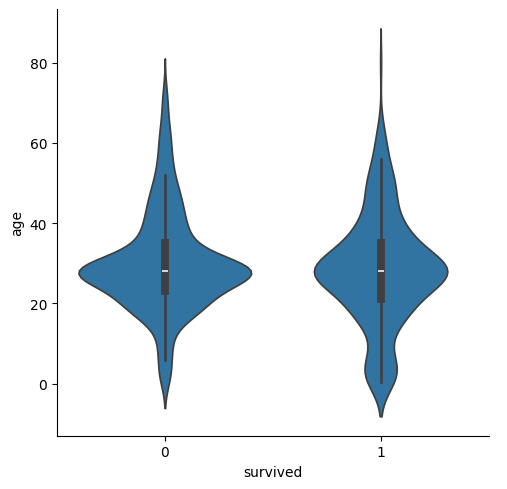

In [28]:
sns.catplot(x='survived', y='age', data=titanic, kind='violin')

## Multivariate

#### A heatmap 
- to get an overall understanding of survival with other values
- We see that it has a slight realtion with pclass, fare & adult_male

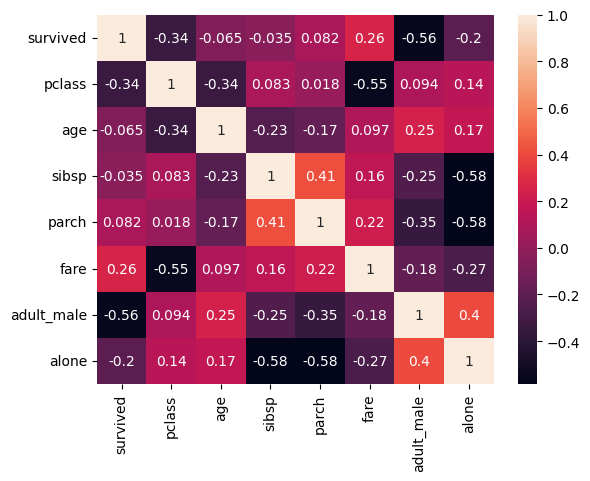

In [30]:
sns.heatmap(titanic.corr(numeric_only=True), annot=True)
plt.show()

#### pairplot
- to better understand the above result

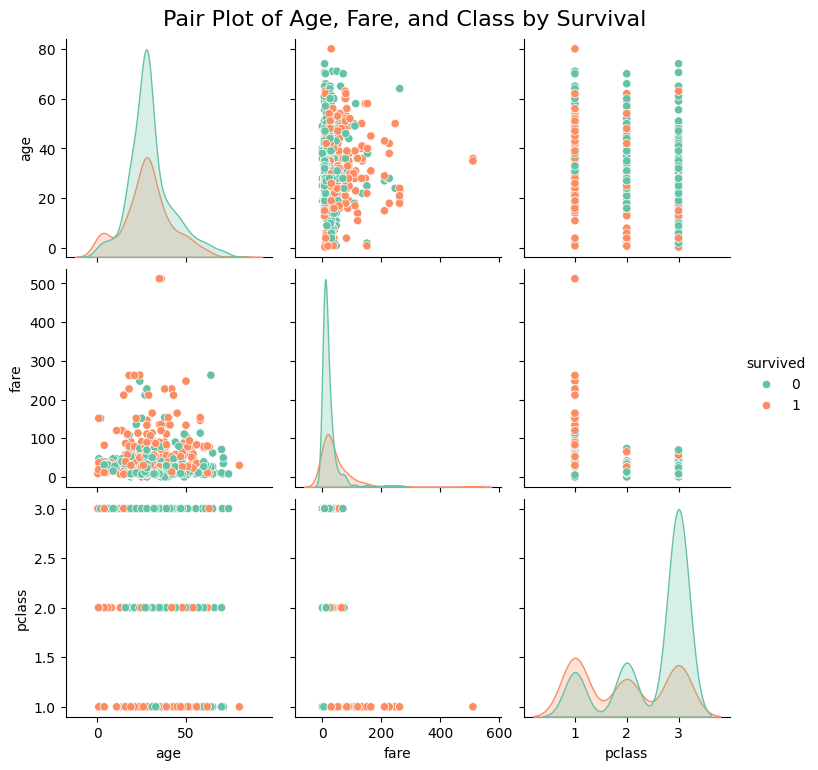

In [31]:
sns.pairplot(titanic, hue='survived', vars=['age', 'fare', 'pclass'], palette='Set2', diag_kind='kde')
plt.suptitle('Pair Plot of Age, Fare, and Class by Survival', y=1.02, fontsize=16)
plt.show()

### subplots

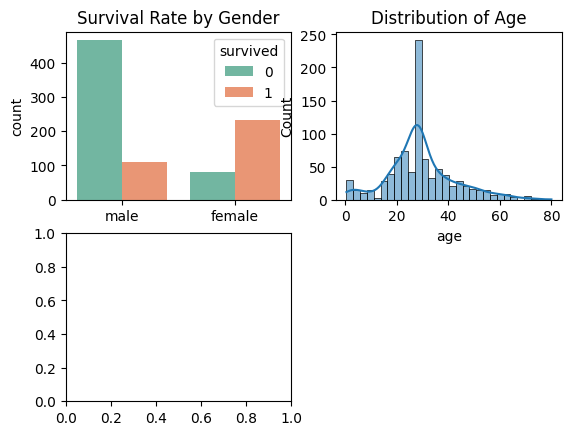

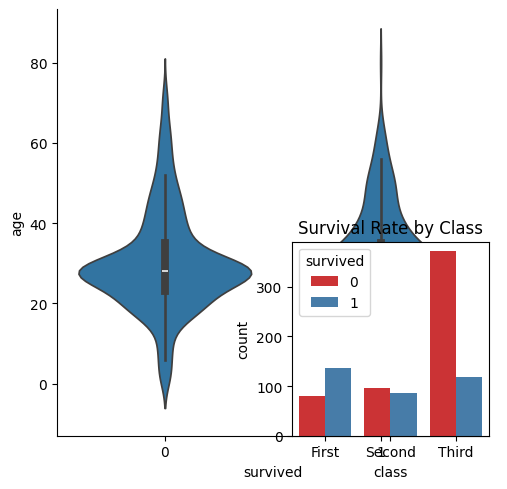

In [35]:
plt.subplot(2,2,1)
sns.countplot(x='sex', hue='survived', data=titanic, palette='Set2')
plt.title('Survival Rate by Gender')

plt.subplot(2,2,2)
sns.histplot(titanic['age'].dropna(), kde=True)
plt.title('Distribution of Age')


plt.subplot(2,2,3)
sns.catplot(x='survived', y='age', data=titanic, kind='violin')

plt.subplot(2,2,4)
sns.countplot(x='class', hue='survived', data=titanic, palette='Set1')
plt.title('Survival Rate by Class')


plt.show()

Text(0.5, 1.0, 'Distribution of Age')

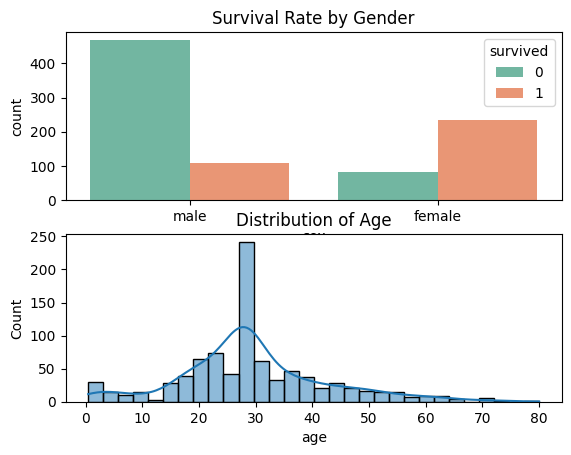

In [38]:
plt.subplot(2,1,1)
sns.countplot(x='sex', hue='survived', data=titanic, palette='Set2')
plt.title('Survival Rate by Gender')

plt.subplot(2,1,2)
sns.histplot(titanic['age'].dropna(), kde=True)
plt.title('Distribution of Age')

